In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


W sumaryzacji widoczne są braki w kolumnie age.

In [5]:
df_numerical =  df.select_dtypes(include=['float64', 'int64'])

<Axes: >

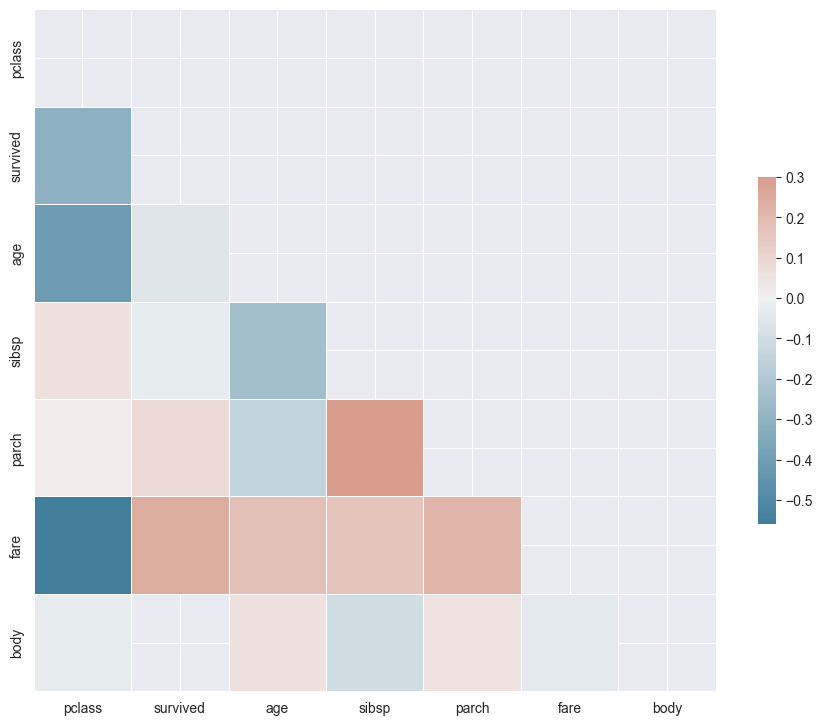

In [6]:
corr = df_numerical.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Z powyższej macierzy korelacji wynika, że nie ma zmiennych, które by były ze sobą silnie skorelowane


In [7]:
miss_age = miss_rows = df[df['name'].str.contains('Miss', case=False)]['age'].mean()
master_age = df[df['name'].str.contains('Master', case=False)]['age'].mean()
mr_age  = df[df['name'].str.contains('Sir|Mr|Mrs|Ms', case=False)]['age'].mean()
dr_age  = df[df['name'].str.contains('Dr', case=False)]['age'].mean()

In [8]:
df.loc[df['name'].str.contains('Miss'), 'age'] = df.loc[df['name'].str.contains('Miss') ,'age'].fillna(miss_age)
df.loc[df['name'].str.contains('Master'), 'age'] = df.loc[df['name'].str.contains('Master') ,'age'].fillna(master_age)
df.loc[df['name'].str.contains('Sir|Mr|Mrs|Ms'), 'age'] = df.loc[df['name'].str.contains('Sir|Mr|Mrs|Ms') ,'age'].fillna(mr_age)
df.loc[df['name'].str.contains('Dr'), 'age'] = df.loc[df['name'].str.contains('Dr') ,'age'].fillna(dr_age)


In [9]:
df['family_size'] = df['parch'] + df['sibsp'] + 1

age_bins = [0, 6, 12, 18, float('inf')]
age_labels = ['Bobas', 'Dzieciak', 'Nastolatek', 'Dorosły']
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df['mpc'] = df['age'] * df['pclass']

In [10]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Dorosły,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Bobas,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Bobas,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Dorosły,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Dorosły,25.0000


In [11]:
df['sex'] = df['sex'].astype('category').cat.codes
df['embarked'] = df['embarked'].astype('category').cat.codes

df['survived'] = df['survived'].astype('category').cat.codes

df['pclass'] = df['pclass'].astype('category').cat.codes
df['age_range'] = df['age_range'].astype('category').cat.codes


In [12]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,family_size,age_range,mpc
0,0,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO",1,3,29.00000
1,0,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON",4,0,0.91670
2,0,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0,2.00000
3,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,3,30.00000
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,3,25.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,0,NaN,328.0,NaN,2,2,43.50000
1305,2,0,"Zabour, Miss. Thamine",0,21.774207,1,0,2665,14.4542,NaN,0,NaN,NaN,NaN,2,3,65.32262
1306,2,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,0,NaN,304.0,NaN,1,3,79.50000
1307,2,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,0,NaN,NaN,NaN,1,3,81.00000


In [13]:
df['embarked'].unique()

array([ 2,  0, -1,  1], dtype=int8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int8   
 1   survived     1309 non-null   int8   
 2   name         1309 non-null   object 
 3   sex          1309 non-null   int8   
 4   age          1309 non-null   float64
 5   sibsp        1309 non-null   int64  
 6   parch        1309 non-null   int64  
 7   ticket       1309 non-null   object 
 8   fare         1308 non-null   float64
 9   cabin        295 non-null    object 
 10  embarked     1309 non-null   int8   
 11  boat         486 non-null    object 
 12  body         121 non-null    float64
 13  home_dest    745 non-null    object 
 14  family_size  1309 non-null   int64  
 15  age_range    1309 non-null   int8   
 16  mpc          1309 non-null   float64
dtypes: float64(4), int64(3), int8(5), object(5)
memory usage: 129.2+ KB


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
columns_to_impute = ['fare', 'embarked']
imputer = IterativeImputer()

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print(df.head())

   pclass  survived                                             name  sex  \
0       0         1                    Allen, Miss. Elisabeth Walton    0   
1       0         1                   Allison, Master. Hudson Trevor    1   
2       0         0                     Allison, Miss. Helen Loraine    0   
3       0         0             Allison, Mr. Hudson Joshua Creighton    1   
4       0         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0   

       age  sibsp  parch  ticket      fare    cabin  embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5       2.0    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26       2.0   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26       2.0  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26       2.0  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26       2.0  NaN    NaN   

                         home_dest  family_size  age_range      mpc  
0   

In [16]:
df.drop(['body','home_dest', 'boat', 'cabin'], axis=1, inplace=True)

<Axes: xlabel='age', ylabel='age'>

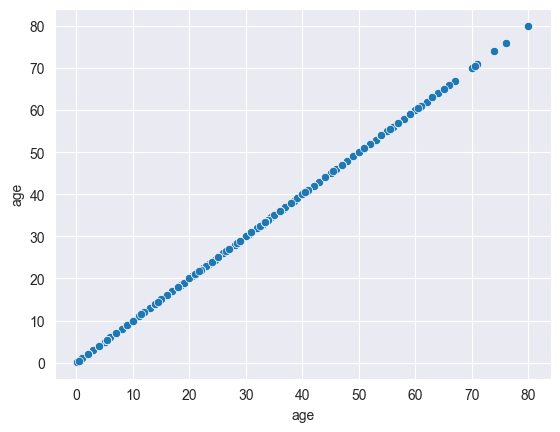

In [17]:
half_df = df[0:5]
sns.scatterplot(x=df['age'], y=df['age'])


<Axes: xlabel='fare', ylabel='fare'>

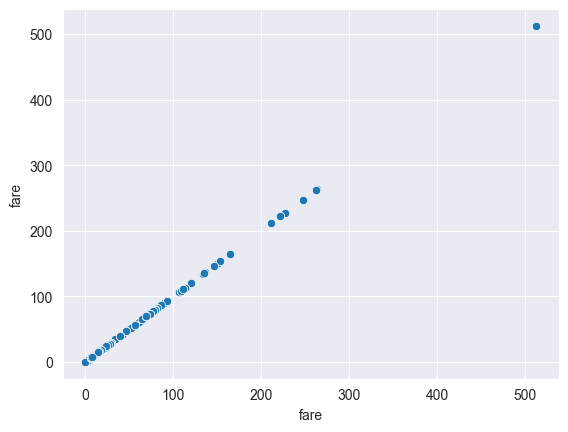

In [18]:
sns.scatterplot(x=df['fare'], y=df['fare'])

In [19]:
mean_age = df['age'].mean()
df.loc[df['age']>67, 'age'] = mean_age
mean_fare = df['fare'].mean()
df.loc[df['fare']>300, 'fare'] = mean_fare

<Axes: xlabel='age', ylabel='age'>

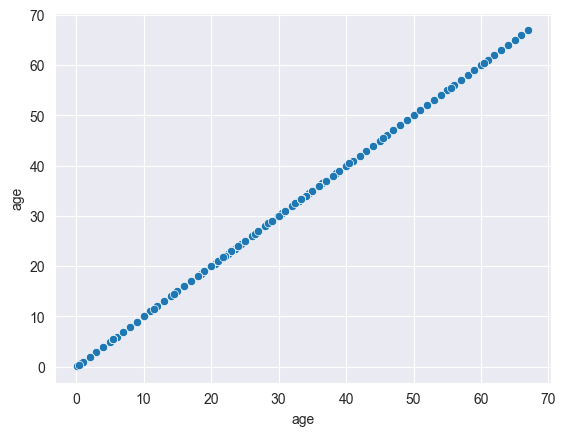

In [20]:
sns.scatterplot(x=df['age'], y=df['age'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int8   
 1   survived     1309 non-null   int8   
 2   name         1309 non-null   object 
 3   sex          1309 non-null   int8   
 4   age          1309 non-null   float64
 5   sibsp        1309 non-null   int64  
 6   parch        1309 non-null   int64  
 7   ticket       1309 non-null   object 
 8   fare         1309 non-null   float64
 9   embarked     1309 non-null   float64
 10  family_size  1309 non-null   int64  
 11  age_range    1309 non-null   int8   
 12  mpc          1309 non-null   float64
dtypes: float64(4), int64(3), int8(4), object(2)
memory usage: 97.3+ KB


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = ['family_size', 'mpc', 'embarked', 'fare','parch','sibsp','age']
numeric_data = df[numeric_columns]
normalized_data = scaler.fit_transform(numeric_data)
df[numeric_columns] = normalized_data

In [24]:
model_columns = ['sex', 'age', 'age_range', 'pclass', 'fare'] 
X_data = df[model_columns]
Y_data = df['survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score

Y_pred_train = dtree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_train)

print(f'Dokładność modelu na danych treningowych: {accuracy:.2%}')

Dokładność modelu na danych treningowych: 76.34%


In [35]:
model_columns = ['parch', 'age', 'family_size', 'pclass', 'embarked']
X_data = df[model_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_train)

print(f'Dokładność modelu na danych treningowych: {accuracy:.2%}')

Dokładność modelu na danych treningowych: 69.47%


In [33]:
model_columns = ['sex', 'age', 'family_size', 'pclass', 'fare', 'embarked']
X_data = df[model_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_train)

print(f'Dokładność modelu na danych treningowych: {accuracy:.2%}')

Dokładność modelu na danych treningowych: 81.68%


In [36]:
model_columns = ['sex', 'age', 'age_range', 'pclass', 'fare']
X_data = df[model_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_train)

print(f'Dokładność modelu na danych treningowych: {accuracy:.2%}')

Dokładność modelu na danych treningowych: 78.24%


In [38]:
model_columns = ['sex', 'age_range', 'pclass', 'fare', 'pclass',  'embarked']
X_data = df[model_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_train)

print(f'Dokładność modelu na danych treningowych: {accuracy:.2%}')

Dokładność modelu na danych treningowych: 83.21%
